In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
!pip install rtmlib -i https://pypi.org/simple
!pip install onnxruntime-gpu
!pip install openvino

In [12]:
import cv2

from rtmlib import RTMPose, draw_skeleton, Wholebody

device = 'cpu'  # cpu, cuda, mps
backend = 'onnxruntime'  # opencv, onnxruntime, openvino

pose_model = RTMPose(onnx_model='../weights/rtmpose-t-17.onnx',
                     model_input_size=(192, 256),
                     backend=backend, device=device)


load ../weights/rtmpose-t-17.onnx with onnxruntime backend


In [13]:
import cv2
import requests

# URL of the image
url = "https://thumbs.dreamstime.com/z/group-construction-workers-guayaquil-ecuador-october-high-angle-view-structure-guayas-river-67657470.jpg"

# Download the image
response = requests.get(url)
with open("downloaded.jpg", "wb") as f:
    f.write(response.content)

# Now read it with OpenCV
# img = cv2.imread("downloaded.jpg")
img = cv2.imread("../sample/images/3.jpg")

(-0.5, 639.5, 639.5, -0.5)

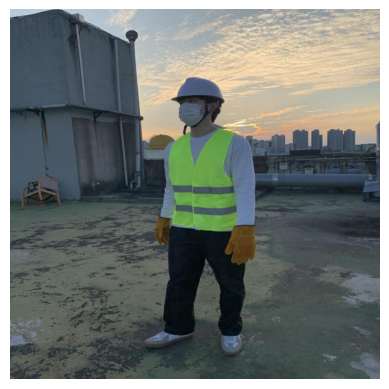

In [14]:
import matplotlib.pyplot as plt

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")

# plot bounding box

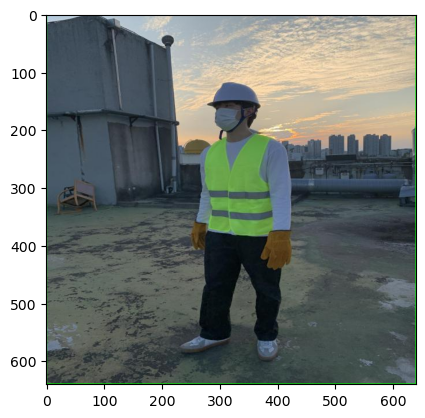

In [15]:
import cv2

# Example: list of bounding boxes in xyxy absolute coordinates
# Replace with your actual detections
# bboxes = [
#     [170, 427, 473, 900],
#     [433, 167, 650, 707],
#     [580, 470, 820, 890],
#     [673, 402, 830, 700],
#     [805, 290, 965, 962], 
#     [935, 355, 1175, 805],
#     [1095, 675, 1398, 1032],
# ]

bboxes = [
    [0, 0 , img.shape[1], img.shape[0]]  # Full image bounding box
]

img_plot = img_rgb.copy()
for box in bboxes:
    x_min, y_min, x_max, y_max = box
    start_point = (int(x_min), int(y_min))
    end_point = (int(x_max), int(y_max))
    
    cv2.rectangle(img_plot, start_point, end_point, color=(0, 255, 0), thickness=2)

plt.imshow(img_plot)


# detect using pose model only

[[[313.75       174.16666667]
  [326.25       163.75      ]
  [305.41666667 163.75      ]
  [353.33333333 172.08333333]
  [292.91666667 172.08333333]
  [386.66666667 228.33333333]
  [282.5        236.66666667]
  [405.41666667 309.58333333]
  [276.25       311.66666667]
  [403.33333333 388.75      ]
  [265.83333333 378.33333333]
  [370.         386.66666667]
  [305.41666667 384.58333333]
  [378.33333333 476.25      ]
  [295.         476.25      ]
  [382.5        547.08333333]
  [292.91666667 549.16666667]]]


(-0.5, 639.5, 639.5, -0.5)

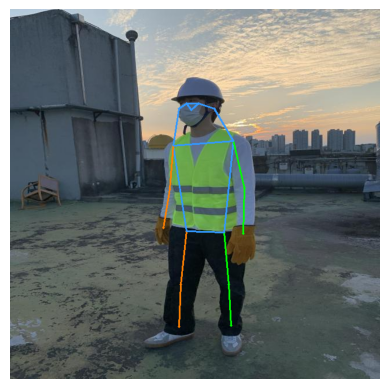

In [16]:
import cv2


openpose_skeleton = True  # True for openpose-style, False for mmpose-style

img_pose = img_rgb.copy()
keypoints, scores = pose_model(img_pose, bboxes)
print(keypoints)
# visualize

# if you want to use black background instead of original image,
# img_show = np.zeros(img_show.shape, dtype=np.uint8)

img_pose = draw_skeleton(img_pose, keypoints, scores, kpt_thr=0.5)


plt.imshow(img_pose)
plt.axis("off")

# detect using detect + pose model

In [17]:
# import cv2

# from rtmlib import RTMPose, draw_skeleton, Body

# device = 'cpu'  # cpu, cuda, mps
# backend = 'onnxruntime'  # opencv, onnxruntime, openvino

# body = Body(det='/kaggle/input/das/onnx/default/1/end2end.onnx',
#             det_input_size=(256, 192),
#             pose='/kaggle/input/das/onnx/default/1/end2end.onnx',
#             pose_input_size=(256, 192),
#             backend=backend,
#             device=device)

In [18]:
# import cv2


# openpose_skeleton = False  # True for openpose-style, False for mmpose-style
# img_rgb = cv2.resize(img_rgb, (416, 416))
# keypoints, scores = body(img_rgb)

# # visualize

# # if you want to use black background instead of original image,
# # img_show = np.zeros(img_show.shape, dtype=np.uint8)

# img_show = draw_skeleton(img_rgb, keypoints, scores, kpt_thr=0.5)


# plt.imshow(img_rgb)
# plt.axis("off")